Company_data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [4]:
company=pd.read_csv('Company_Data (1).csv')

EDA

In [5]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
company.shape

(400, 11)

In [10]:
company.isna()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [11]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [12]:
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [13]:
company.duplicated().sum()

0

In [14]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [15]:
company.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

Data_Visualization 

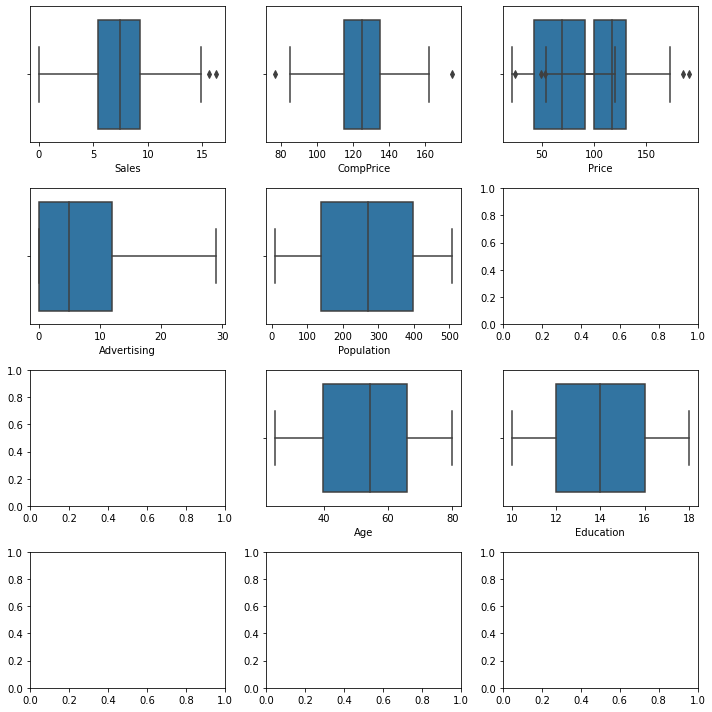

In [16]:
fig, ax=plt.subplots(4,3, figsize=(10,10))
sns.boxplot(company.Sales,ax=ax[0,0])
sns.boxplot(company.CompPrice,ax=ax[0,1])
sns.boxplot(company.Income,ax=ax[0,2])
sns.boxplot(company.Advertising,ax=ax[1,0])
sns.boxplot(company.Population,ax=ax[1,1])
sns.boxplot(company.Price,ax=ax[0,2])
sns.boxplot(company.Age,ax=ax[2,1])
sns.boxplot(company.Education,ax=ax[2,2])

plt.tight_layout()
plt.show()

In [17]:
#taking high sales above 7.49 as it is average of Sales
company['sales']=(company['Sales']>7.4)*1
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


creating numerical variables for categorical data

In [18]:
#label_encoder
label_encoder=preprocessing.LabelEncoder()

In [19]:
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['US']=label_encoder.fit_transform(company['US'])

In [20]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,0


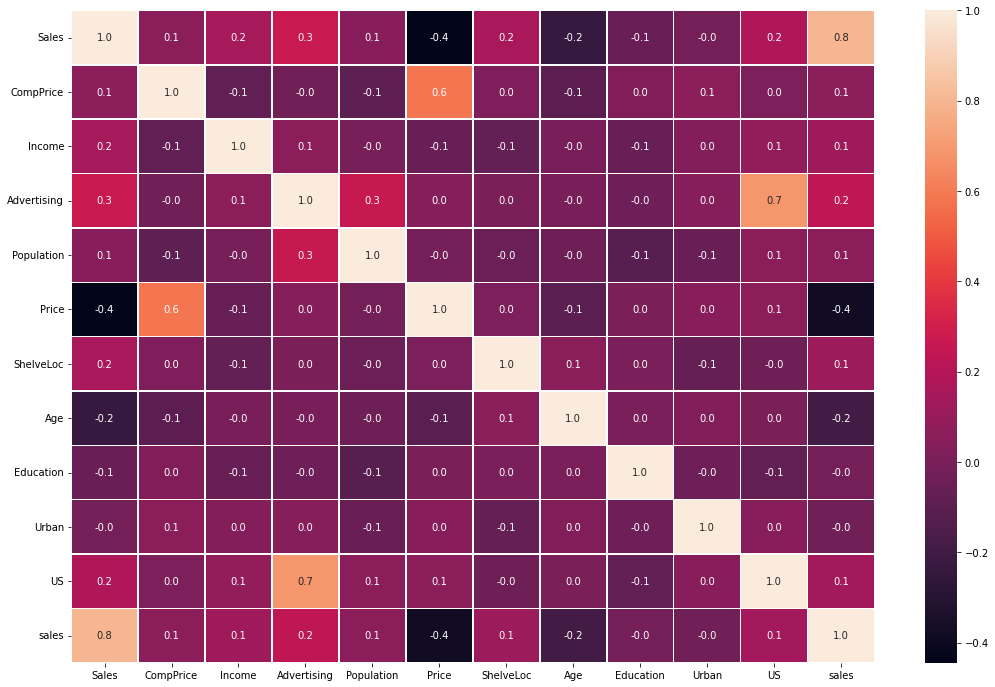

In [21]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(company.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

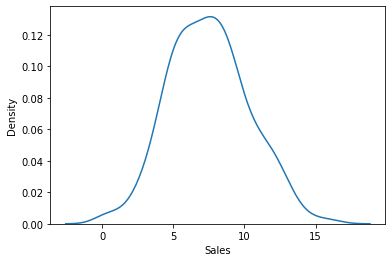

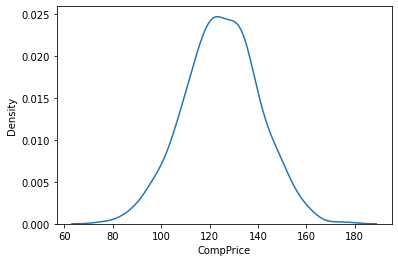

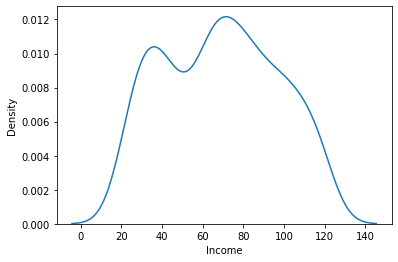

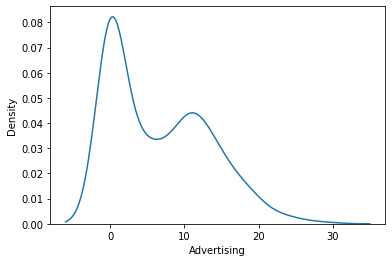

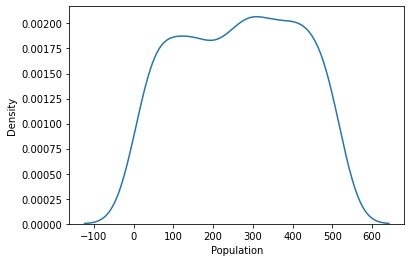

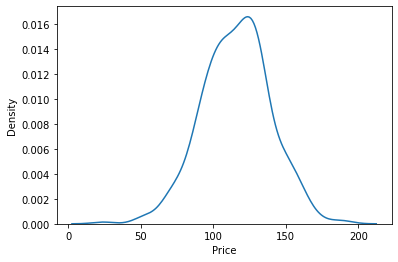

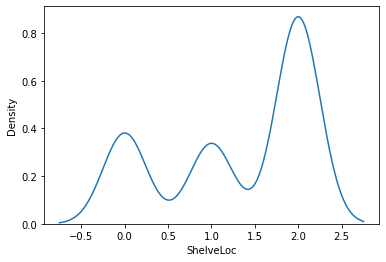

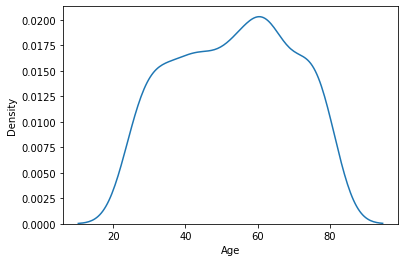

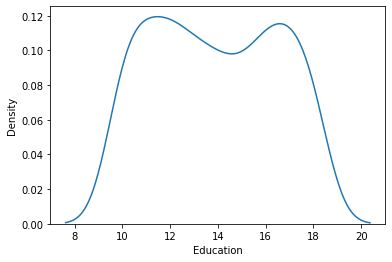

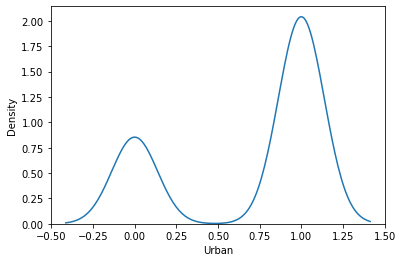

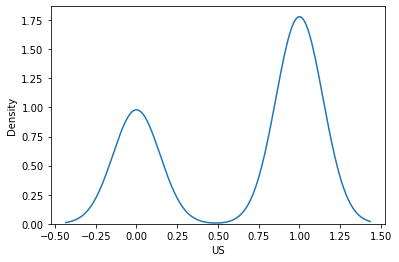

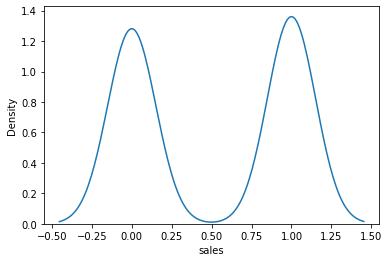

In [22]:
#Kernel density
for n in company.columns:
  sns.kdeplot(company[n])
  plt.show()

creating dataframe with all independent variables

In [23]:
x=company.iloc[:,1:9]

In [24]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14
396,139,23,3,37,120,2,55,11
397,162,26,12,368,159,2,40,18
398,100,79,7,284,95,0,50,12


creating dataframe with the target variable 

In [25]:
y=company.iloc[:,-1].values

In [26]:
y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

Using K-Fold

In [27]:
kfold=KFold(n_splits=10)

Constructing Random Forest Classifier model

In [28]:
model=RandomForestClassifier(n_estimators=110,max_features=6)

Evaluating the cross validation score

In [29]:
result=cross_val_score(model,x,y,cv=kfold)

In [30]:
result.mean()

0.82

Splitting data into train and test

In [31]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

Fittng Model on train data

In [32]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=110)

Predicting the model on the train data and evaluate train accuracy

In [33]:
y_pred=model.predict(x_train)

In [34]:
print("accuracy:",metrics.accuracy_score(y_train,y_pred))

accuracy: 1.0


Predicting the model on test data

In [35]:
Y_pred=model.predict(x_test)

In [36]:
print("accuracy:",metrics.accuracy_score(y_test,Y_pred))

accuracy: 0.8


Test accuracy

In [37]:
model.score(x_test,y_test)

0.8

Identifying and Selecting important features and sorting them in order

In [38]:
feature_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

In [39]:
feature_imp

Price          0.284670
CompPrice      0.138487
Age            0.130776
ShelveLoc      0.114887
Advertising    0.113238
Income         0.099952
Population     0.079640
Education      0.038351
dtype: float64

Data Visualization

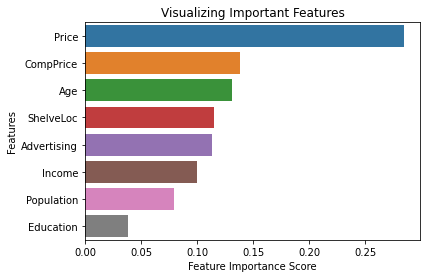

In [40]:
#barplot
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

DataFrame for train and test accuracy for various max_features

In [41]:
train_accuracy=[]
test_accuracy=[]
for max_features in range(1,10):
   model=RandomForestClassifier(n_estimators=110,max_features=5)
   model.fit(x_train,y_train)
   train_accuracy.append(model.score(x_train,y_train))
   test_accuracy.append(model.score(x_test,y_test))

In [42]:
train_accuracy

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [43]:
test_accuracy

[0.775,
 0.775,
 0.7833333333333333,
 0.7916666666666666,
 0.775,
 0.7666666666666667,
 0.8,
 0.7583333333333333,
 0.7583333333333333]

creating train and test accuracy dataframe

In [45]:
accuracies=pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
accuracies

,max_features,train_acc,test_acc
0,1,1.0,0.775000
1,2,1.0,0.775000
2,3,1.0,0.783333
3,4,1.0,0.791667
4,5,1.0,0.775000
5,6,1.0,0.766667
6,7,1.0,0.800000
7,8,1.0,0.758333
8,9,1.0,0.758333


Visualizing accuracy score for various max_features

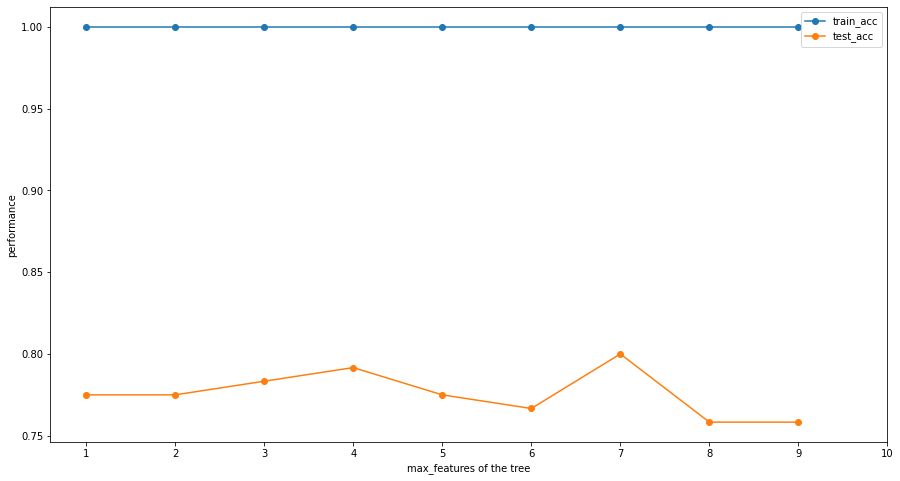

In [46]:
labels=['train_acc','test_acc']
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot()
plt.plot(accuracies['max_features'],accuracies['train_acc'],marker='o')
plt.plot(accuracies['max_features'],accuracies['test_acc'],marker='o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

Conclusion: Therefore,the Randomforest Classifier with maximum feature is 7,then the accuracy of the model is 80%.Thus,it is a good model for classification of segments or attributes in the cloth manufacturing which causes high sale.



fraud_Data

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')


In [48]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1).csv


In [50]:
fraud=pd.read_csv('Fraud_check (1).csv')

EDA

In [51]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [52]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [53]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [54]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [55]:
fraud.shape

(600, 6)

In [56]:
fraud.isna()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [57]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [58]:
fraud.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [59]:
fraud.duplicated().sum()

0

In [60]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


Data Visualization

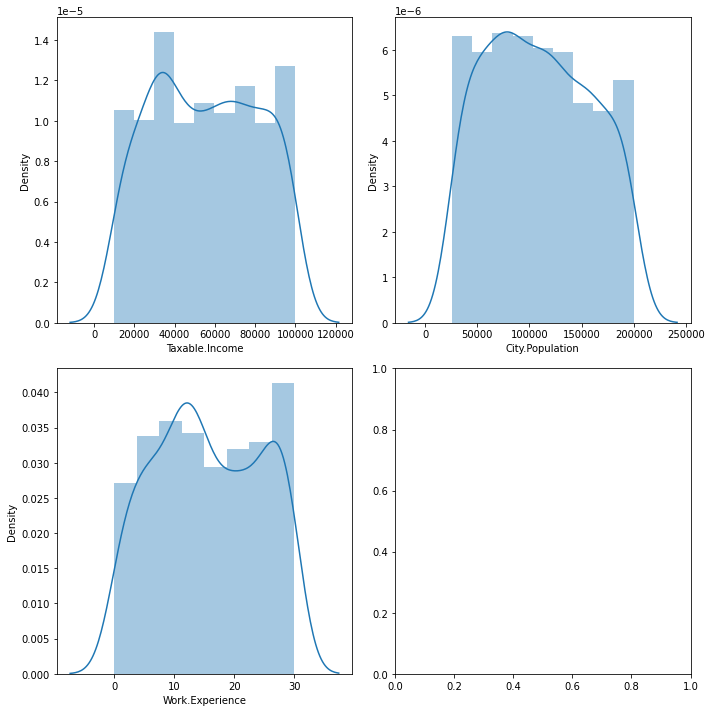

In [61]:
fig, ax=plt.subplots(2,2,figsize=(10,10))

sns.distplot(fraud["Taxable.Income"],ax=ax[0,0])
sns.distplot(fraud["City.Population"],ax=ax[0,1])
sns.distplot(fraud["Work.Experience"],ax=ax[1,0])

plt.tight_layout()
plt.show()

Creating numerical variables for categorical variables

In [62]:
#label encoding
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [63]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


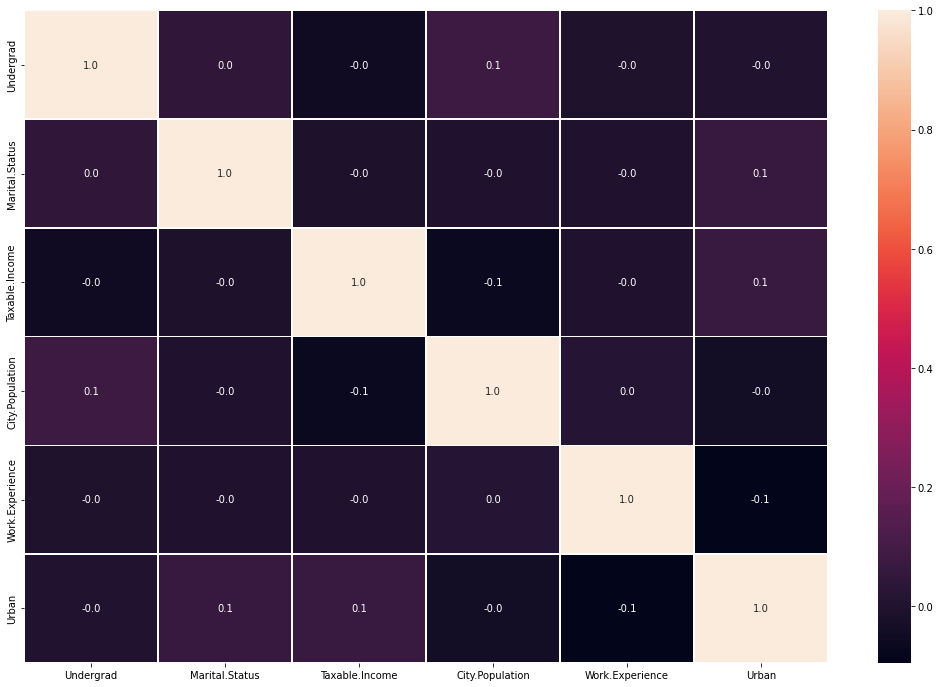

In [64]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(fraud.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

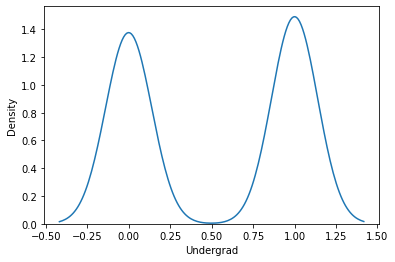

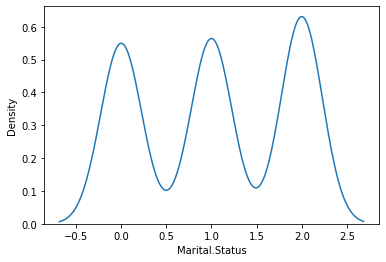

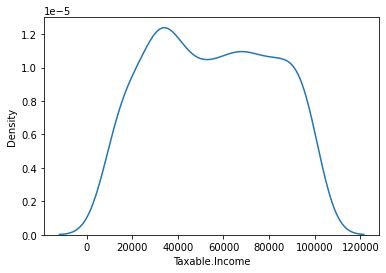

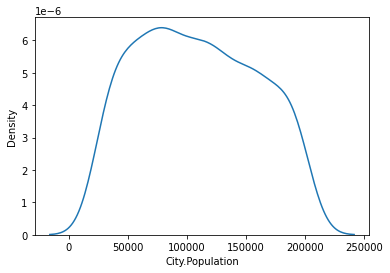

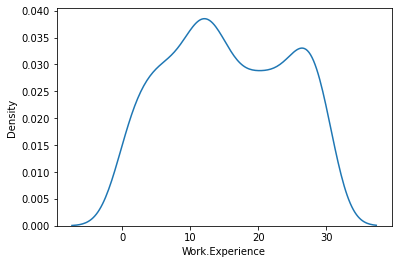

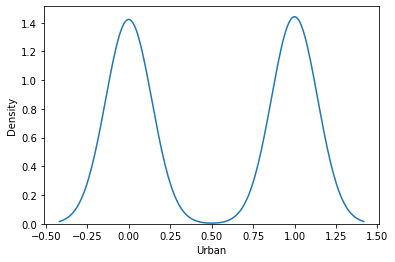

In [65]:
#Kernel density
for n in fraud.columns:
  sns.kdeplot(fraud[n])
  plt.show()

Taking high income above 30000 as it is average of Taxable.Income

In [66]:
fraud['Taxable.Income']=(fraud['Taxable.Income']>30000)*1

In [67]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


Assigning the values of independent and target variables 

In [68]:
x=fraud.drop(axis=1,columns="Taxable.Income")
y=fraud["Taxable.Income"]

In [69]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [70]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [71]:
fraud["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

Splitting data into train and test data

In [72]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

Constructing RandomForest Classifier Model

In [73]:
model=RandomForestClassifier(n_estimators=110,max_features=3)

In [74]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

Predicting the model on train data and evaluate train accuracy

In [75]:
y_pred=model.predict(x_train)

In [76]:
print("accuracy:",metrics.accuracy_score(y_train,y_pred))

accuracy: 1.0


In [77]:
model.score(x_train,y_train)

1.0

Predicting the model on test data and evaluate test accuracy

In [78]:
Y_pred=model.predict(x_test)

In [79]:
print("accuracy:",metrics.accuracy_score(y_test,Y_pred))

accuracy: 0.7333333333333333


In [80]:
model.score(x_test,y_test)

0.7333333333333333

Identifying and selecting important Features and sorting them in order

In [81]:
feature_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

In [82]:
feature_imp

City.Population    0.540402
Work.Experience    0.274799
Marital.Status     0.080968
Undergrad          0.054156
Urban              0.049675
dtype: float64

Data Visualization

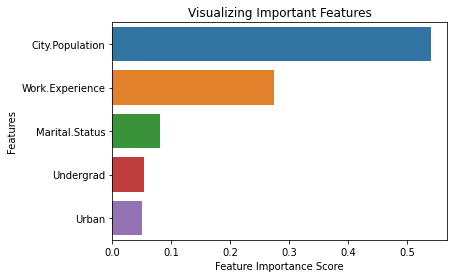

In [83]:
#bar plot
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Creating DataFrame for various max_features

In [85]:
train_accuracy=[]
test_accuracy=[]
for max_features in range(1,10):
   model=RandomForestClassifier(n_estimators=110,max_features=3)
   model.fit(x_train,y_train)
   train_accuracy.append(model.score(x_train,y_train))
   test_accuracy.append(model.score(x_test,y_test))

In [86]:
train_accuracy

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [87]:
test_accuracy

[0.7277777777777777,
 0.7333333333333333,
 0.7388888888888889,
 0.7166666666666667,
 0.7388888888888889,
 0.7222222222222222,
 0.7277777777777777,
 0.7444444444444445,
 0.7333333333333333]

In [88]:
accuracies=pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
accuracies

,max_features,train_acc,test_acc
0,1,1.0,0.727778
1,2,1.0,0.733333
2,3,1.0,0.738889
3,4,1.0,0.716667
4,5,1.0,0.738889
5,6,1.0,0.722222
6,7,1.0,0.727778
7,8,1.0,0.744444
8,9,1.0,0.733333


Visualizing accuracy for various max_features

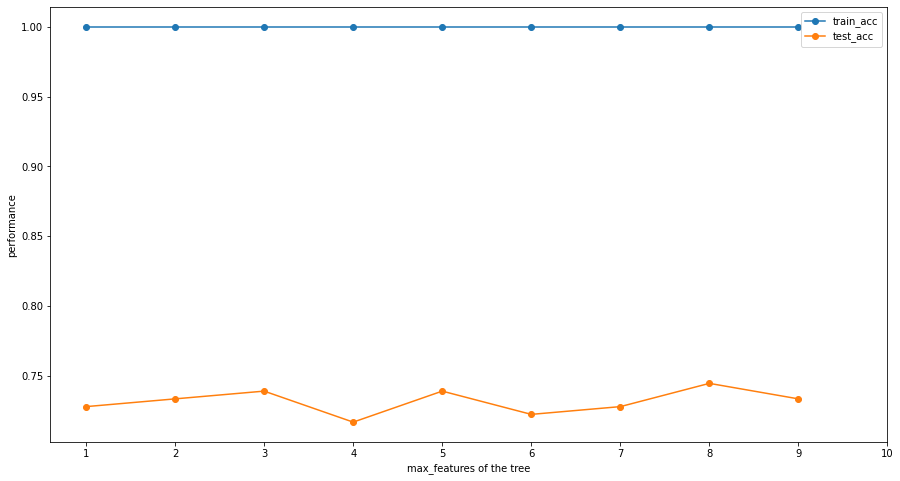

In [89]:
labels=['train_acc','test_acc']
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot()
plt.plot(accuracies['max_features'],accuracies['train_acc'],marker='o')
plt.plot(accuracies['max_features'],accuracies['test_acc'],marker='o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

Confusion_matrix

In [90]:
cm=confusion_matrix(y_test,Y_pred)

In [91]:
cm

array([[  3,  41],
       [  7, 129]])

visualizing confusion matrix with Heatmap

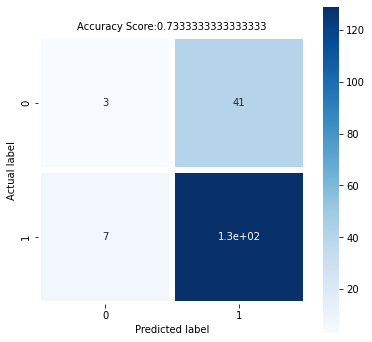

In [92]:
cm=confusion_matrix(y_test,Y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm,linewidth=5,annot=True,square=True,cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
all_sample_title='Accuracy Score:{0}'.format(model.score(x_test,y_test))
plt.title(all_sample_title,size=10)
plt.show()

predicting_values for test data

In [93]:
Y_pred=model.predict(x_test)
print('Classification report - \n',classification_report(y_test,Y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.30      0.07      0.11        44
           1       0.76      0.95      0.84       136

    accuracy                           0.73       180
   macro avg       0.53      0.51      0.48       180
weighted avg       0.65      0.73      0.66       180



Checking Cross_Validation KFold split for increase in accuracy score of the model

In [95]:
kfold=KFold(n_splits=8)

In [96]:
result=cross_val_score(model,x,y,cv=kfold)

In [97]:
result.mean()

0.7316666666666667

Checking accuracy score by AdaBoost Classifier

In [99]:
num_trees=10
seed=7
kfold=KFold(n_splits=10)

In [100]:
model=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)

In [101]:
results=cross_val_score(model,x,y,cv=kfold)

In [102]:
results.mean()

0.7916666666666666

Checking train data on the model

In [103]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [104]:
y_pred=model.predict(x_train)

In [105]:
print("accuracy:",metrics.accuracy_score(y_train,y_pred))

accuracy: 0.8119047619047619


In [106]:
model.score(x_train,y_train)

0.8119047619047619

Checking accuracy score on test data on the model

In [107]:
Y_pred=model.predict(x_test)

In [108]:
print("accuracy:",metrics.accuracy_score(y_test,Y_pred))

accuracy: 0.7555555555555555


In [109]:
model.score(x_test,y_test)

0.7555555555555555

Conclusion: Therefore,the highest accuracy score from RandomForest Classifier is,when it takes 8 maximum features is 74.44%.Thus,this model can be used to classify and predict the given fraud data.

And also,the AdaBoost Classifier model gives the accuracy score of 81.19%.so,this model used to classify the given fraud data.